# IMDB Movies - Exploratory Data Analysis (EDA)

This notebook contains comprehensive EDA of the IMDB movies dataset, covering:
1. Rating Distribution
2. Votes Distribution (Popularity)
3. Ratings vs. Votes
4. Ratings by Genre
5. Ratings by Decade
6. Number of Movies per Decade
7. Genre Evolution Over Time
8. Runtime vs. Rating

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

/Users/vaishnavverma/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/gp/0qsbr0x11d315dt15fl17c940000gn/T/matplotlib-t7shvf4m because there was an issue with the default path (/Users/vaishnavverma/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


In [2]:
# Load the processed data
df = pd.read_csv('../data/processed/imdb_movies_processed.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (337971, 32)

Column names: ['tconst', 'primaryTitle', 'originalTitle', 'titleType', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'decade', 'primaryGenre', 'numGenres', 'logVotes', 'bayes_rating', 'runtime_bin', 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror', 'genre_Other', 'genre_Romance', 'genre_Thriller', 'genre_Unknown']

First few rows:


,tconst,primaryTitle,originalTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Other,genre_Romance,genre_Thriller,genre_Unknown
0,tt0000009,Miss Jerry,Miss Jerry,movie,0,1894.0,45.0,Romance,5.2,232.0,...,False,False,False,False,False,False,False,True,False,False
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,movie,0,1897.0,100.0,"Documentary,News,Sport",5.3,577.0,...,False,True,False,False,False,False,False,False,False,False
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,movie,0,1900.0,40.0,"Biography,Drama",5.5,64.0,...,False,False,False,False,False,False,False,False,False,False
3,tt0000502,Bohemios,Bohemios,movie,0,1905.0,100.0,Unknown,3.3,26.0,...,False,False,False,False,False,False,False,False,False,True
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,movie,0,1906.0,70.0,"Action,Adventure,Biography",6.0,1037.0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Data overview
print("Dataset Info:")
print(f"Total records: {len(df):,}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df.describe()}")

Dataset Info:
Total records: 337,971

Data types:
tconst                object
primaryTitle          object
originalTitle         object
titleType             object
isAdult                int64
startYear            float64
runtimeMinutes       float64
genres                object
averageRating        float64
numVotes             float64
decade                 int64
primaryGenre          object
numGenres              int64
logVotes             float64
bayes_rating         float64
runtime_bin           object
genre_Action            bool
genre_Adult             bool
genre_Adventure         bool
genre_Animation         bool
genre_Biography         bool
genre_Comedy            bool
genre_Crime             bool
genre_Documentary       bool
genre_Drama             bool
genre_Family            bool
genre_Fantasy           bool
genre_Horror            bool
genre_Other             bool
genre_Romance           bool
genre_Thriller          bool
genre_Unknown           bool
dtype: object

Missing

In [4]:
# Create log-transformed votes column for better visualization
df['logVotes'] = np.log10(df['numVotes'] + 1)

# Extract primary genre (first genre in the list)
df['primaryGenre'] = df['genres'].str.split(',').str[0]

print("Feature engineering completed!")
print(f"\nTop 10 primary genres:\n{df['primaryGenre'].value_counts().head(10)}")

Feature engineering completed!

Top 10 primary genres:
primaryGenre
Drama          95507
Comedy         69173
Documentary    46540
Action         34508
Crime          15933
Horror         14234
Adventure      13312
Unknown        11317
Biography       9754
Thriller        5406
Name: count, dtype: int64


## 1️⃣ Rating Distribution
**Purpose**: Core measure of quality perception  
**Insight**: Shows audience rating bias (IMDb typically peaks around 6–7)

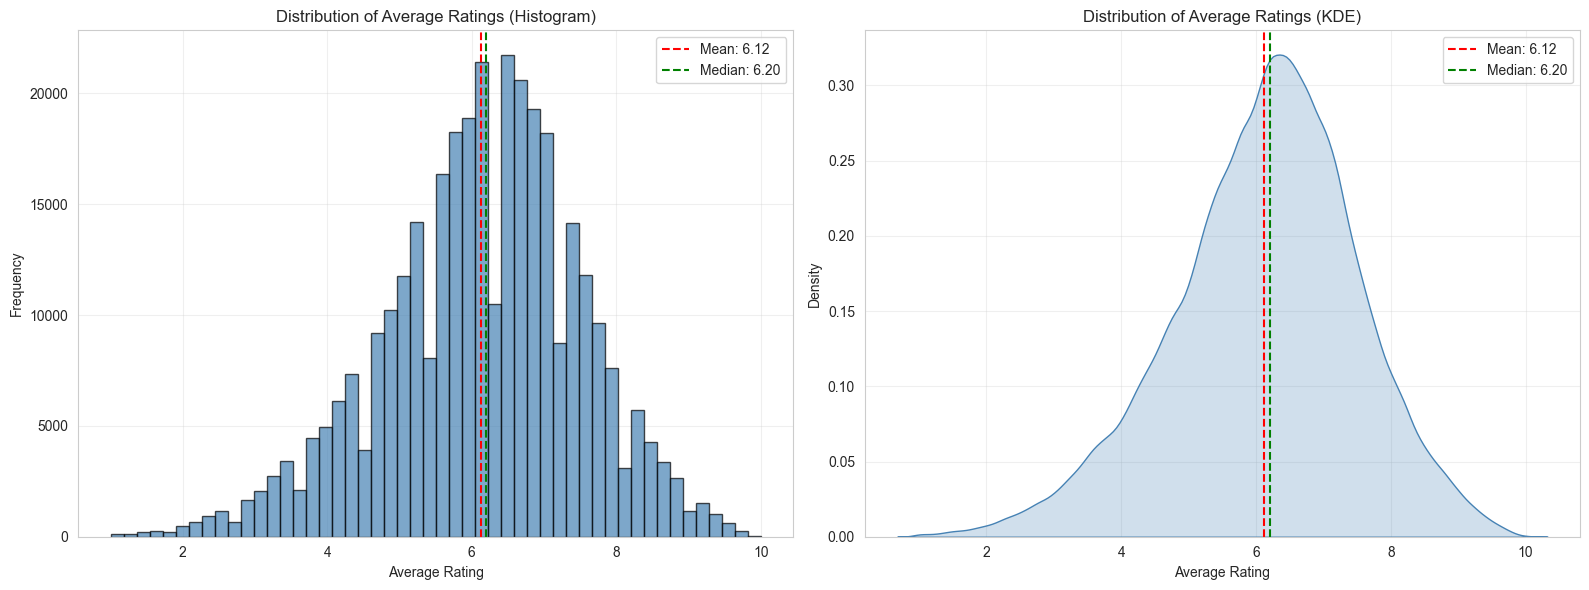

Rating Statistics:
Mean: 6.12
Median: 6.20
Mode: 6.20
Std Dev: 1.38
Skewness: -0.35


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['averageRating'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Average Ratings (Histogram)')
axes[0].axvline(df['averageRating'].mean(), color='red', linestyle='--', label=f'Mean: {df["averageRating"].mean():.2f}')
axes[0].axvline(df['averageRating'].median(), color='green', linestyle='--', label=f'Median: {df["averageRating"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# KDE plot
sns.kdeplot(data=df, x='averageRating', fill=True, ax=axes[1], color='steelblue')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Average Ratings (KDE)')
axes[1].axvline(df['averageRating'].mean(), color='red', linestyle='--', label=f'Mean: {df["averageRating"].mean():.2f}')
axes[1].axvline(df['averageRating'].median(), color='green', linestyle='--', label=f'Median: {df["averageRating"].median():.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Rating Statistics:")
print(f"Mean: {df['averageRating'].mean():.2f}")
print(f"Median: {df['averageRating'].median():.2f}")
print(f"Mode: {df['averageRating'].mode()[0]:.2f}")
print(f"Std Dev: {df['averageRating'].std():.2f}")
print(f"Skewness: {df['averageRating'].skew():.2f}")

## 2️⃣ Votes Distribution (Popularity)
**Purpose**: Shows audience engagement  
**Insight**: Reveals skew — few movies get massive attention

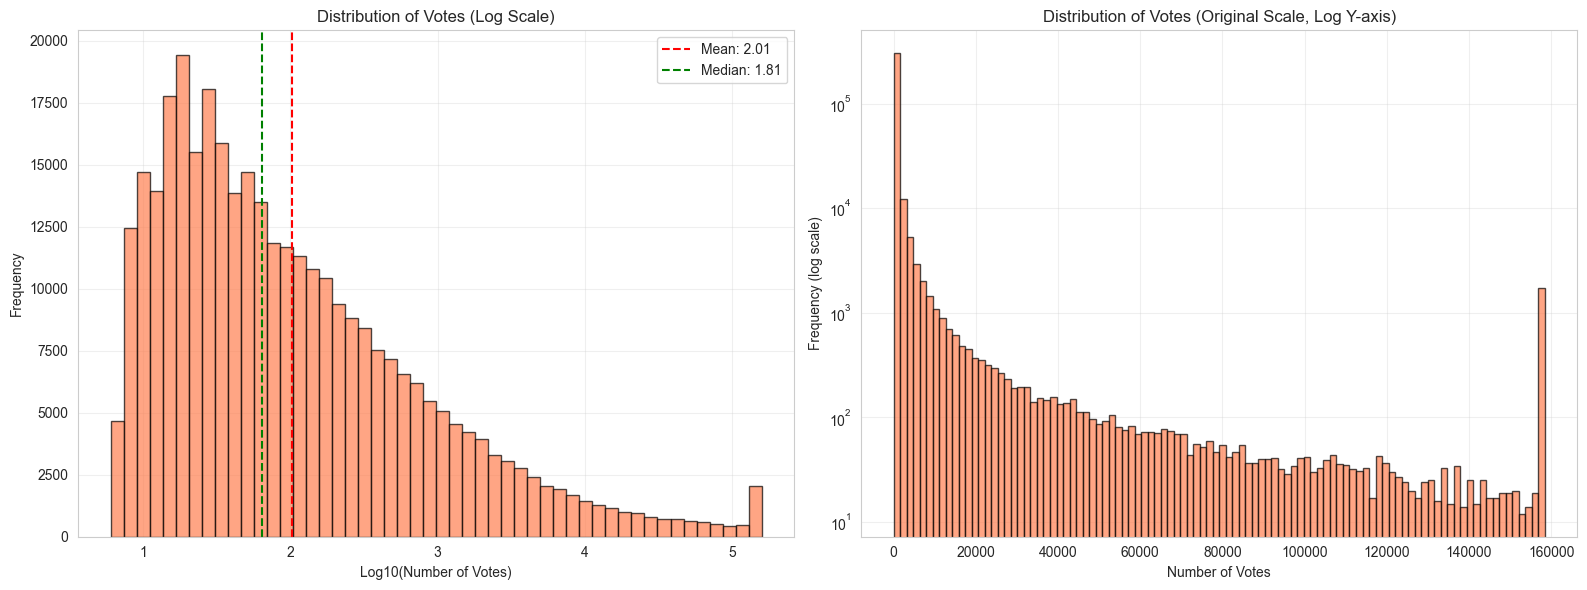

Votes Statistics:
Mean: 2,464
Median: 63
Max: 158,438
Min: 5

Top 10 most voted movies:
                          primaryTitle  startYear   numVotes  averageRating
3067                        Metropolis     1927.0  158437.85            8.3
5091                       City Lights     1931.0  158437.85            8.5
5302                                 M     1931.0  158437.85            8.3
8838                      Modern Times     1936.0  158437.85            8.5
9911   Snow White and the Seven Dwarfs     1937.0  158437.85            7.6
11111               Gone with the Wind     1939.0  158437.85            8.2
11641                 The Wizard of Oz     1939.0  158437.85            8.1
11926               The Great Dictator     1940.0  158437.85            8.4
12180                        Pinocchio     1940.0  158437.85            7.5
12213                          Rebecca     1940.0  158437.85            8.1


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Log-scale histogram of numVotes
axes[0].hist(df['logVotes'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Log10(Number of Votes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Votes (Log Scale)')
axes[0].axvline(df['logVotes'].mean(), color='red', linestyle='--', label=f'Mean: {df["logVotes"].mean():.2f}')
axes[0].axvline(df['logVotes'].median(), color='green', linestyle='--', label=f'Median: {df["logVotes"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Original scale with log y-axis
axes[1].hist(df['numVotes'], bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Number of Votes')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].set_title('Distribution of Votes (Original Scale, Log Y-axis)')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Votes Statistics:")
print(f"Mean: {df['numVotes'].mean():,.0f}")
print(f"Median: {df['numVotes'].median():,.0f}")
print(f"Max: {df['numVotes'].max():,.0f}")
print(f"Min: {df['numVotes'].min():,.0f}")
print(f"\nTop 10 most voted movies:")
print(df.nlargest(10, 'numVotes')[['primaryTitle', 'startYear', 'numVotes', 'averageRating']])

## 3️⃣ Ratings vs. Votes (Popularity–Quality Tradeoff)
**Purpose**: Tests if highly popular movies get higher/lower ratings  
**Insight**: Reveals the relationship between popularity and perceived quality

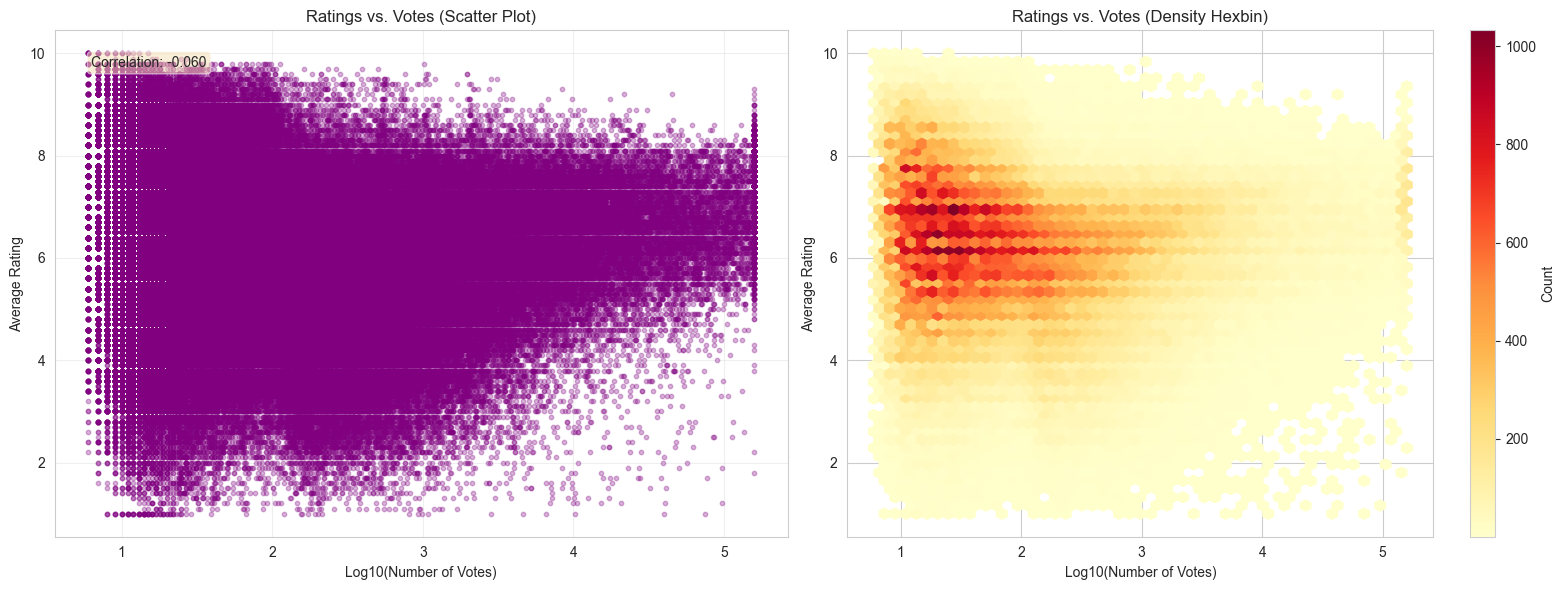

Correlation between log(votes) and rating: -0.060
Correlation between votes and rating: 0.068


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with transparency
axes[0].scatter(df['logVotes'], df['averageRating'], alpha=0.3, s=10, color='purple')
axes[0].set_xlabel('Log10(Number of Votes)')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Ratings vs. Votes (Scatter Plot)')
axes[0].grid(True, alpha=0.3)

# Calculate correlation
correlation = df[['logVotes', 'averageRating']].corr().iloc[0, 1]
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hexbin plot for better density visualization
hexbin = axes[1].hexbin(df['logVotes'], df['averageRating'], gridsize=50, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Log10(Number of Votes)')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Ratings vs. Votes (Density Hexbin)')
plt.colorbar(hexbin, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

print(f"Correlation between log(votes) and rating: {correlation:.3f}")
print(f"Correlation between votes and rating: {df[['numVotes', 'averageRating']].corr().iloc[0, 1]:.3f}")

## 4️⃣ Ratings by Genre
**Purpose**: Identifies audience preferences  
**Insight**: Reveals which genres consistently perform better

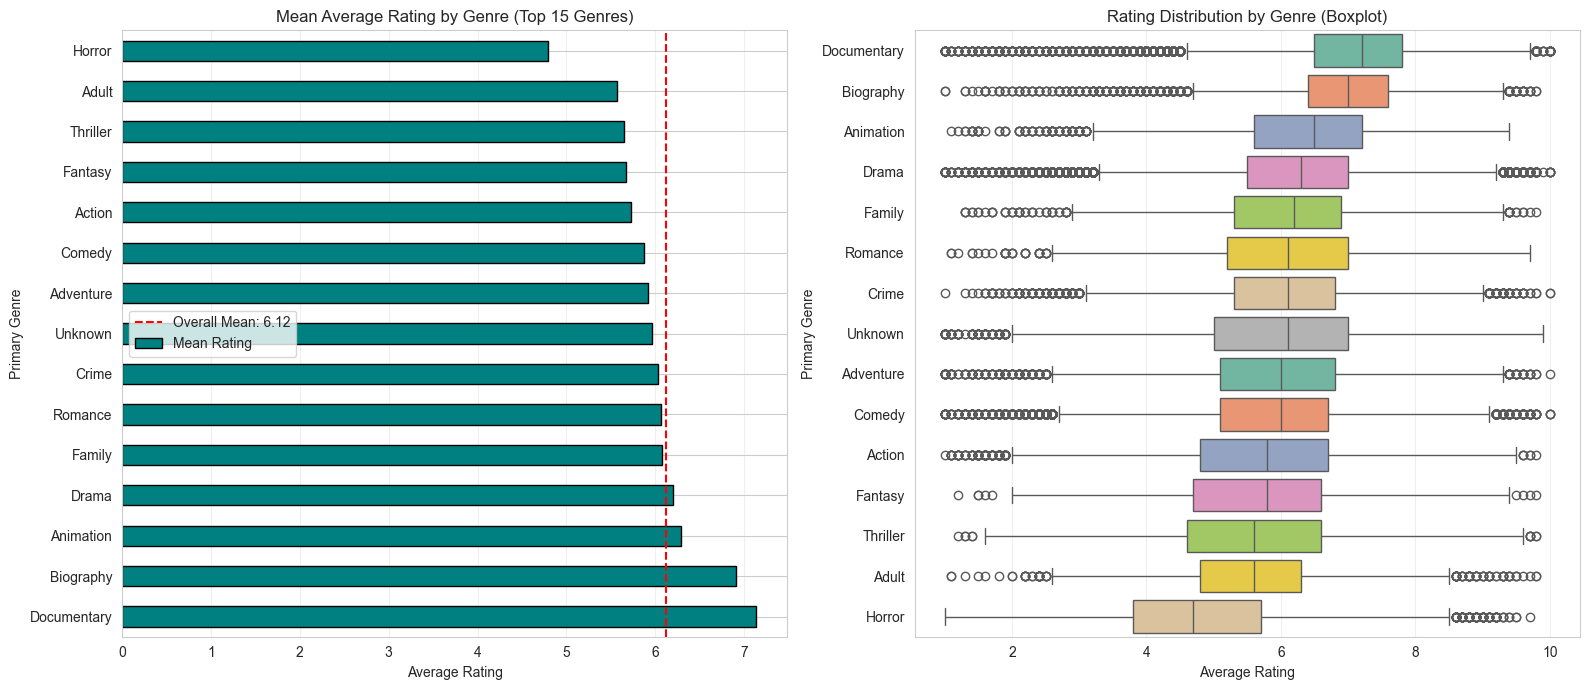

Genre Rating Statistics (Top 15 Genres by Count):
              Mean Rating  Median Rating  Count
primaryGenre                                   
Documentary          7.13            7.2  46540
Biography            6.91            7.0   9754
Animation            6.29            6.5   3177
Drama                6.20            6.3  95507
Family               6.08            6.2   2387
Romance              6.06            6.1   3540
Crime                6.03            6.1  15933
Unknown              5.96            6.1  11317
Adventure            5.92            6.0  13312
Comedy               5.87            6.0  69173
Action               5.73            5.8  34508
Fantasy              5.67            5.8   1825
Thriller             5.65            5.6   5406
Adult                5.57            5.6   4644
Horror               4.79            4.7  14234


In [8]:
# Calculate mean rating by genre (top 15 genres by count)
top_genres = df['primaryGenre'].value_counts().head(15).index
genre_ratings = df[df['primaryGenre'].isin(top_genres)].groupby('primaryGenre').agg({
    'averageRating': ['mean', 'median', 'count']
}).round(2)

genre_ratings.columns = ['Mean Rating', 'Median Rating', 'Count']
genre_ratings = genre_ratings.sort_values('Mean Rating', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar plot of mean ratings
genre_ratings['Mean Rating'].plot(kind='barh', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Primary Genre')
axes[0].set_title('Mean Average Rating by Genre (Top 15 Genres)')
axes[0].axvline(df['averageRating'].mean(), color='red', linestyle='--', 
                label=f'Overall Mean: {df["averageRating"].mean():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Box plot
genre_order = genre_ratings.index.tolist()
df_plot = df[df['primaryGenre'].isin(top_genres)]
sns.boxplot(data=df_plot, y='primaryGenre', x='averageRating', 
            order=genre_order, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Primary Genre')
axes[1].set_title('Rating Distribution by Genre (Boxplot)')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Genre Rating Statistics (Top 15 Genres by Count):")
print(genre_ratings)

## 5️⃣ Ratings by Decade
**Purpose**: Captures temporal trends  
**Insight**: Shows if audience perception shifts over time

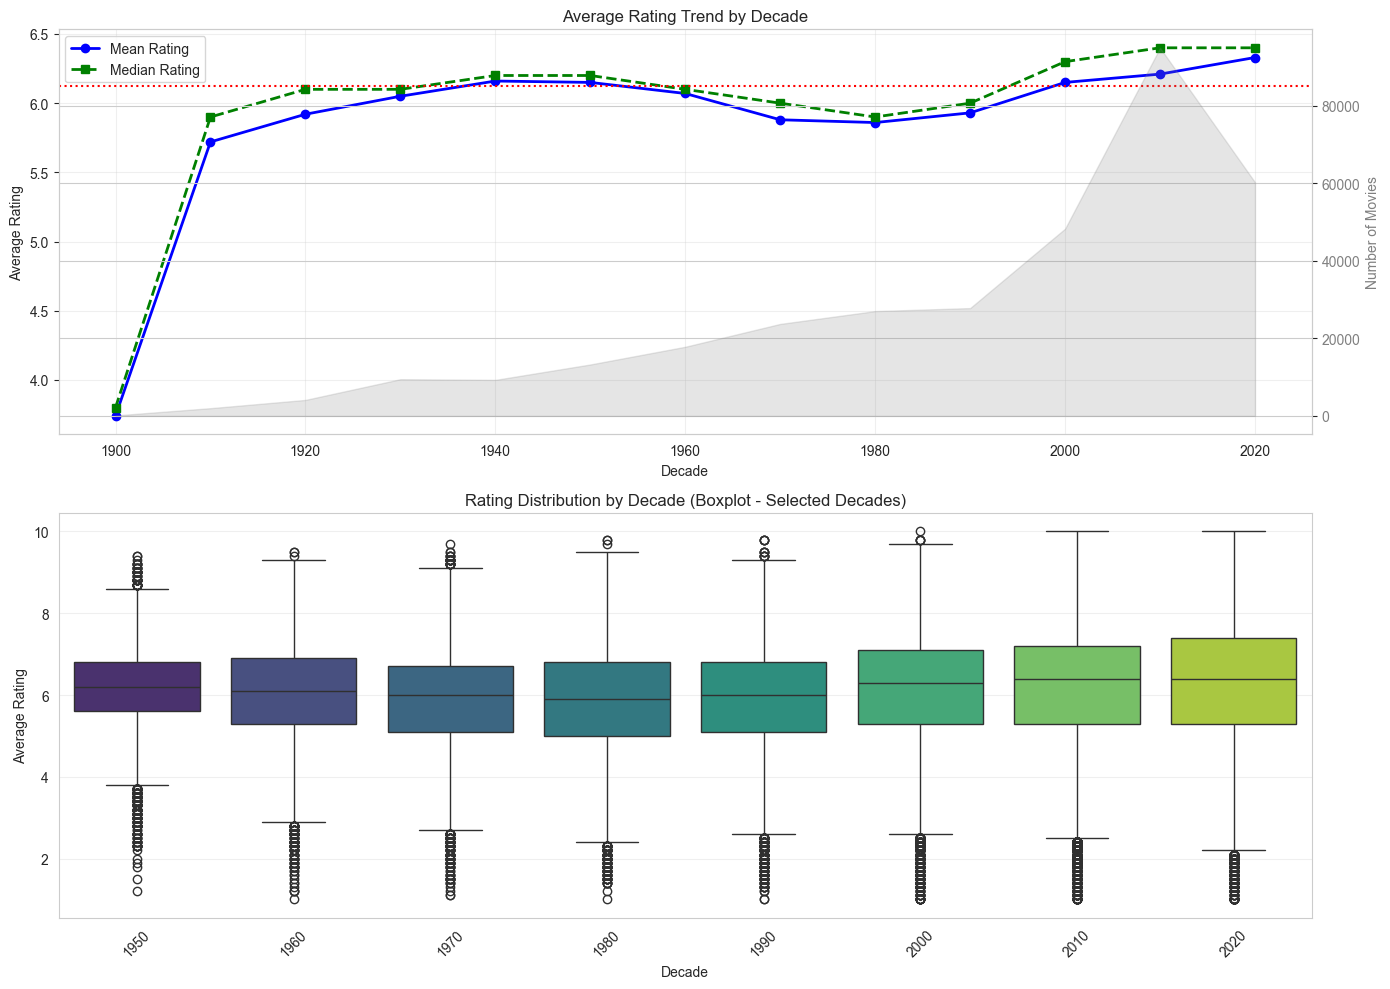

Rating Statistics by Decade:
        Mean Rating  Median Rating  Movie Count
decade                                         
1900           3.74            3.8          125
1910           5.72            5.9         1994
1920           5.92            6.1         4122
1930           6.05            6.1         9464
1940           6.16            6.2         9281
1950           6.15            6.2        13256
1960           6.07            6.1        17821
1970           5.88            6.0        23710
1980           5.86            5.9        27016
1990           5.93            6.0        27794
2000           6.15            6.3        48269
2010           6.21            6.4        94883
2020           6.33            6.4        60218


In [9]:
# Calculate ratings by decade
decade_ratings = df.groupby('decade').agg({
    'averageRating': ['mean', 'median'],
    'tconst': 'count'
}).round(2)

decade_ratings.columns = ['Mean Rating', 'Median Rating', 'Movie Count']
decade_ratings = decade_ratings[decade_ratings.index >= 1900]  # Filter out very old decades with few movies

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Line plot of mean and median ratings
axes[0].plot(decade_ratings.index, decade_ratings['Mean Rating'], 
             marker='o', linewidth=2, label='Mean Rating', color='blue')
axes[0].plot(decade_ratings.index, decade_ratings['Median Rating'], 
             marker='s', linewidth=2, label='Median Rating', color='green', linestyle='--')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Average Rating Trend by Decade')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axhline(df['averageRating'].mean(), color='red', linestyle=':', 
                label=f'Overall Mean: {df["averageRating"].mean():.2f}')

# Area plot with count overlay
ax2 = axes[0].twinx()
ax2.fill_between(decade_ratings.index, decade_ratings['Movie Count'], 
                  alpha=0.2, color='gray', label='Movie Count')
ax2.set_ylabel('Number of Movies', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Box plot by decade (sample decades for clarity)
sample_decades = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
df_sample = df[df['decade'].isin(sample_decades)]
sns.boxplot(data=df_sample, x='decade', y='averageRating', ax=axes[1], palette='viridis')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Rating Distribution by Decade (Boxplot - Selected Decades)')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Rating Statistics by Decade:")
print(decade_ratings)

## 6️⃣ Number of Movies per Decade
**Purpose**: Measures production growth  
**Insight**: Visualizes explosion of film output

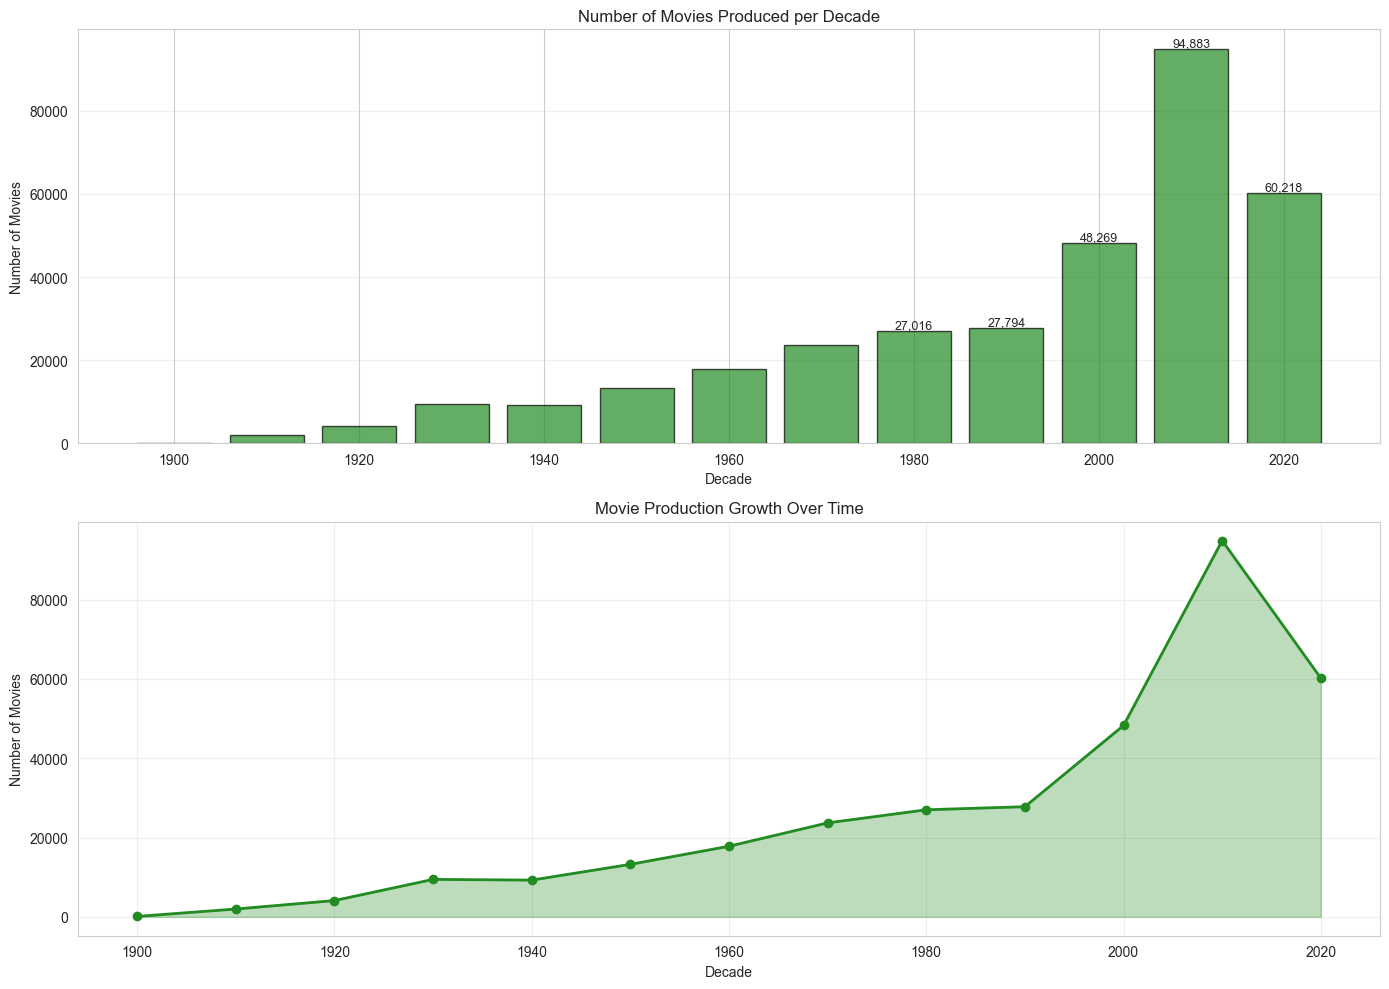

Movies per Decade:
        Count
decade       
1900      125
1910     1994
1920     4122
1930     9464
1940     9281
1950    13256
1960    17821
1970    23710
1980    27016
1990    27794
2000    48269
2010    94883
2020    60218

Total movies: 337,953
Peak decade: 2010 with 94,883 movies


In [10]:
# Count movies per decade
movies_per_decade = df['decade'].value_counts().sort_index()
movies_per_decade = movies_per_decade[movies_per_decade.index >= 1900]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Bar chart
axes[0].bar(movies_per_decade.index, movies_per_decade.values, 
            width=8, edgecolor='black', alpha=0.7, color='forestgreen')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies Produced per Decade')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars for recent decades
for decade in movies_per_decade.index[-5:]:
    count = movies_per_decade[decade]
    axes[0].text(decade, count, f'{count:,}', ha='center', va='bottom', fontsize=9)

# Line chart with growth rate
axes[1].plot(movies_per_decade.index, movies_per_decade.values, 
             marker='o', linewidth=2, markersize=6, color='forestgreen')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Movie Production Growth Over Time')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(movies_per_decade.index, movies_per_decade.values, alpha=0.3, color='forestgreen')

plt.tight_layout()
plt.show()

print("Movies per Decade:")
print(movies_per_decade.to_frame(name='Count'))
print(f"\nTotal movies: {movies_per_decade.sum():,}")
print(f"Peak decade: {movies_per_decade.idxmax()} with {movies_per_decade.max():,} movies")

## 7️⃣ Genre Evolution Over Time
**Purpose**: Combines genre + time  
**Insight**: Answers "how have genres changed in popularity?"

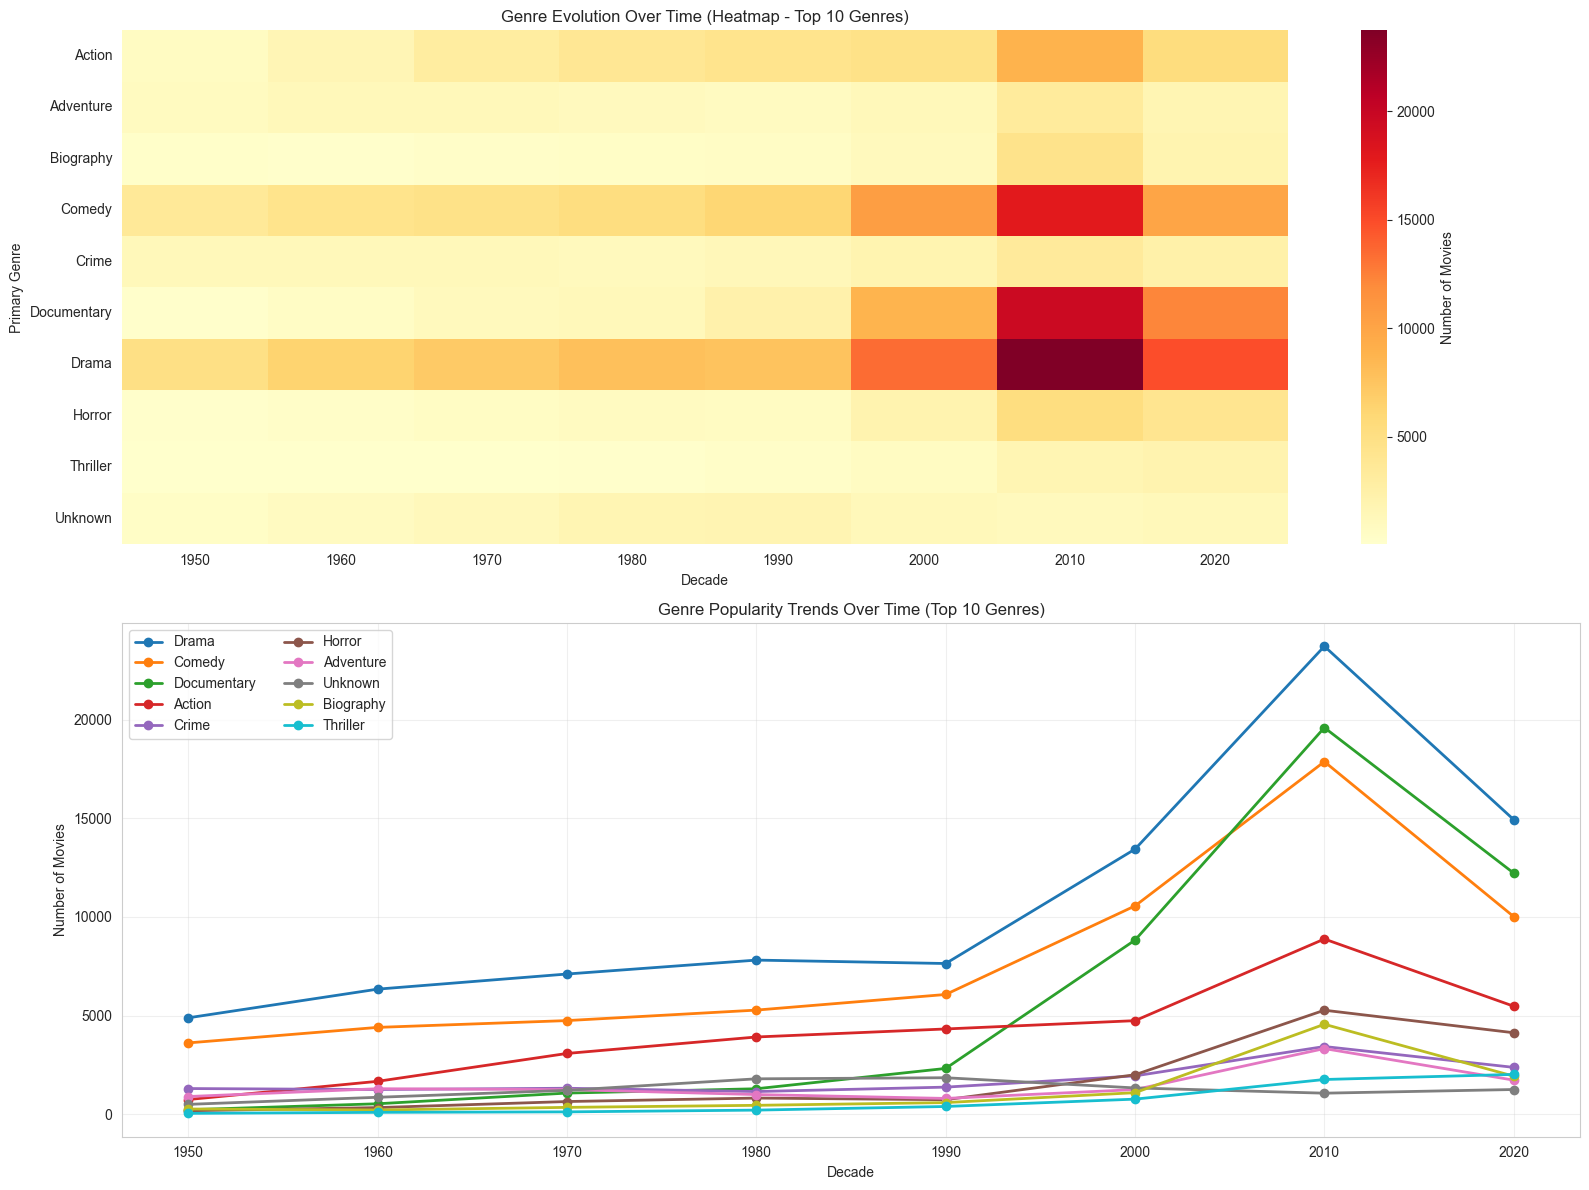

Genre counts by decade (Top 10 Genres, 1950 onwards):
decade        1950  1960  1970  1980  1990   2000   2010   2020
primaryGenre                                                   
Action         741  1664  3078  3913  4320   4741   8883   5473
Adventure      893  1289  1244   993   797   1245   3325   1725
Biography      261   210   343   447   586   1088   4558   1926
Comedy        3613  4400  4745  5277  6069  10562  17878  10018
Crime         1298  1248  1313  1146  1370   1940   3430   2372
Documentary    223   526  1068  1287  2318   8827  19604  12224
Drama         4886  6340  7107  7813  7640  13441  23731  14936
Horror         171   332   639   815   732   1998   5271   4128
Thriller        39    91   115   204   388    761   1757   2015
Unknown        496   855  1207  1791  1846   1329   1063   1249


In [11]:
# Create genre-decade crosstab (top 10 genres)
top_10_genres = df['primaryGenre'].value_counts().head(10).index
df_genre_time = df[df['primaryGenre'].isin(top_10_genres) & (df['decade'] >= 1950)]

genre_decade_counts = pd.crosstab(df_genre_time['primaryGenre'], df_genre_time['decade'])

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Heatmap
sns.heatmap(genre_decade_counts, annot=False, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Movies'}, ax=axes[0])
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Primary Genre')
axes[0].set_title('Genre Evolution Over Time (Heatmap - Top 10 Genres)')

# Line plot showing trends
for genre in top_10_genres:
    genre_data = df_genre_time[df_genre_time['primaryGenre'] == genre]['decade'].value_counts().sort_index()
    axes[1].plot(genre_data.index, genre_data.values, marker='o', label=genre, linewidth=2)

axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Genre Popularity Trends Over Time (Top 10 Genres)')
axes[1].legend(loc='best', ncol=2)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Genre counts by decade (Top 10 Genres, 1950 onwards):")
print(genre_decade_counts)

Correlation Analysis:

Correlation Matrix:
                averageRating  numVotes  logVotes  runtimeMinutes  \
averageRating        1.000000  0.068430 -0.059734        0.007656   
numVotes             0.068430  1.000000  0.503751        0.017522   
logVotes            -0.059734  0.503751  1.000000        0.034765   
runtimeMinutes       0.007656  0.017522  0.034765        1.000000   
bayes_rating         0.681288  0.186418  0.042237        0.016449   
startYear            0.076809  0.041771  0.055661        0.015604   
numGenres           -0.051880  0.172105  0.392031        0.011306   

                bayes_rating  startYear  numGenres  
averageRating       0.681288   0.076809  -0.051880  
numVotes            0.186418   0.041771   0.172105  
logVotes            0.042237   0.055661   0.392031  
runtimeMinutes      0.016449   0.015604   0.011306  
bayes_rating        1.000000  -0.060747  -0.032023  
startYear          -0.060747   1.000000  -0.036918  
numGenres          -0.032023  -0.

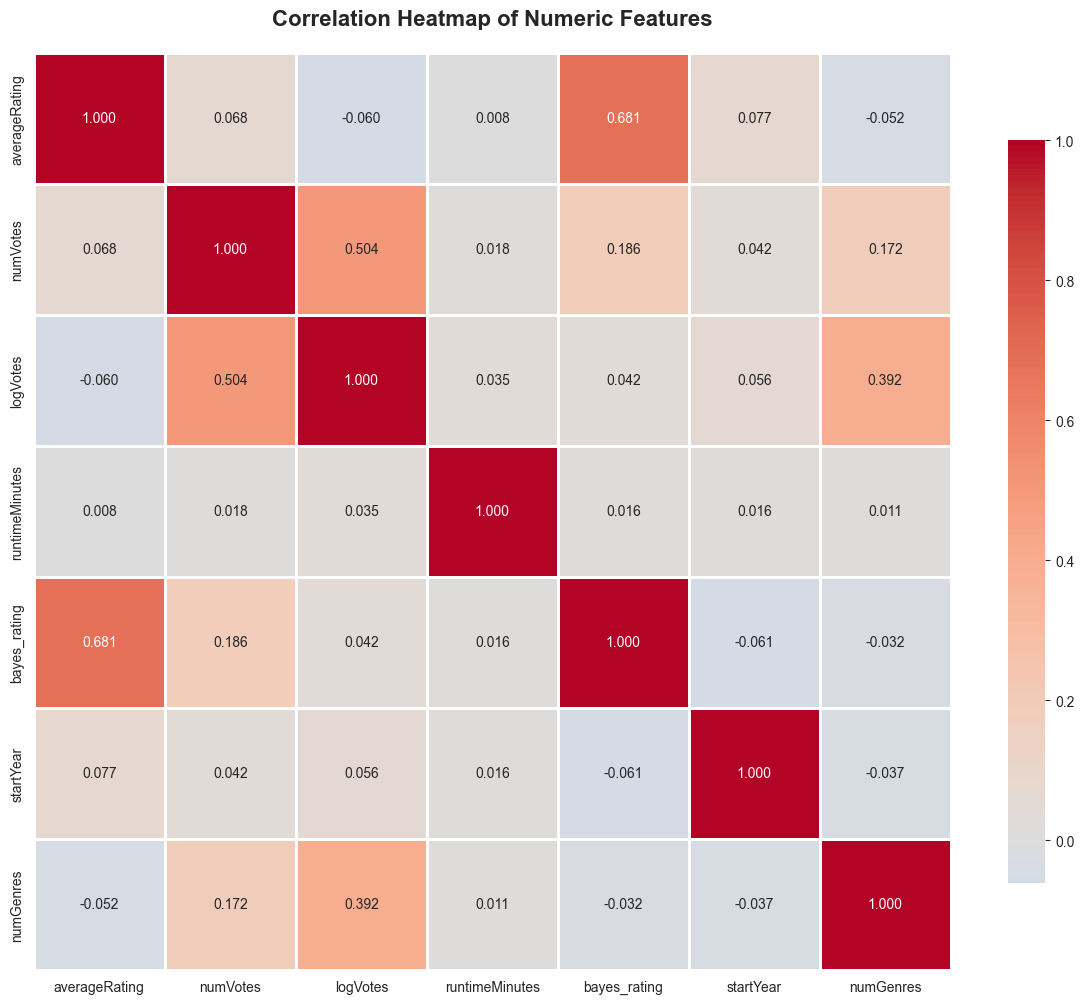


Key Correlations with Average Rating:
bayes_rating        :   0.681
startYear           :   0.077
numVotes            :   0.068
runtimeMinutes      :   0.008
numGenres           :  -0.052
logVotes            :  -0.060

Creating Pairwise Scatterplots...


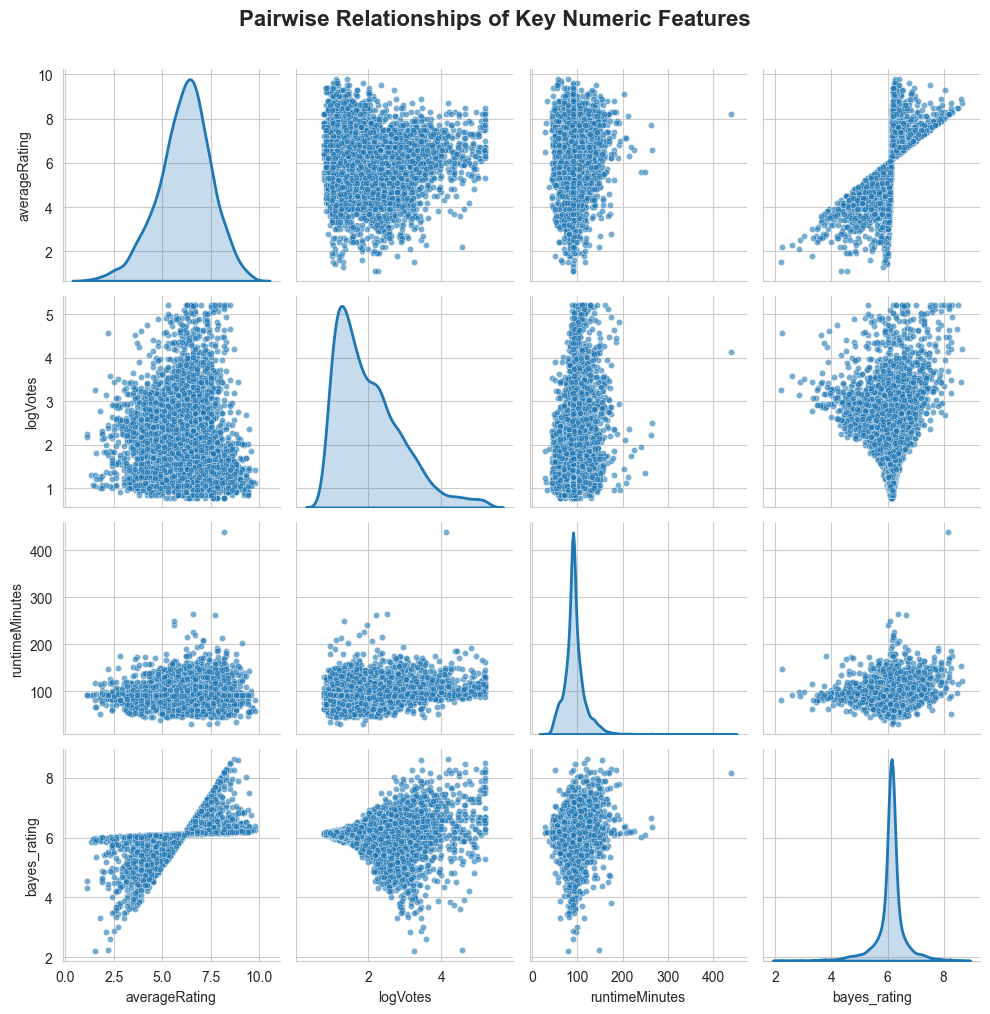


Note: Pairplot created using a sample of 5,000 movies for performance.


In [12]:
# Correlation Analysis
print("="*80)
print("Correlation Analysis:")
print("="*80)

# Select numeric columns for correlation analysis
numeric_cols = ['averageRating', 'numVotes', 'logVotes', 'runtimeMinutes', 'bayes_rating', 'startYear', 'numGenres']
correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)
ax.set_title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print key correlations
print("\n" + "="*80)
print("Key Correlations with Average Rating:")
print("="*80)
rating_correlations = correlation_matrix['averageRating'].sort_values(ascending=False)
for feature, corr_value in rating_correlations.items():
    if feature != 'averageRating':
        print(f"{feature:20s}: {corr_value:7.3f}")

# Pairwise scatterplots for key numeric variables
print("\n" + "="*80)
print("Creating Pairwise Scatterplots...")
print("="*80)

# Sample data for faster plotting (if dataset is large)
sample_size = min(5000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

pairplot = sns.pairplot(df_sample, 
                        vars=['averageRating', 'logVotes', 'runtimeMinutes', 'bayes_rating'],
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 20},
                        diag_kws={'linewidth': 2})
pairplot.fig.suptitle('Pairwise Relationships of Key Numeric Features', 
                      y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nNote: Pairplot created using a sample of {sample_size:,} movies for performance.")

## 8️⃣ Runtime vs. Rating
**Purpose**: Checks if length affects ratings  
**Insight**: Tests correlation between pacing & audience liking

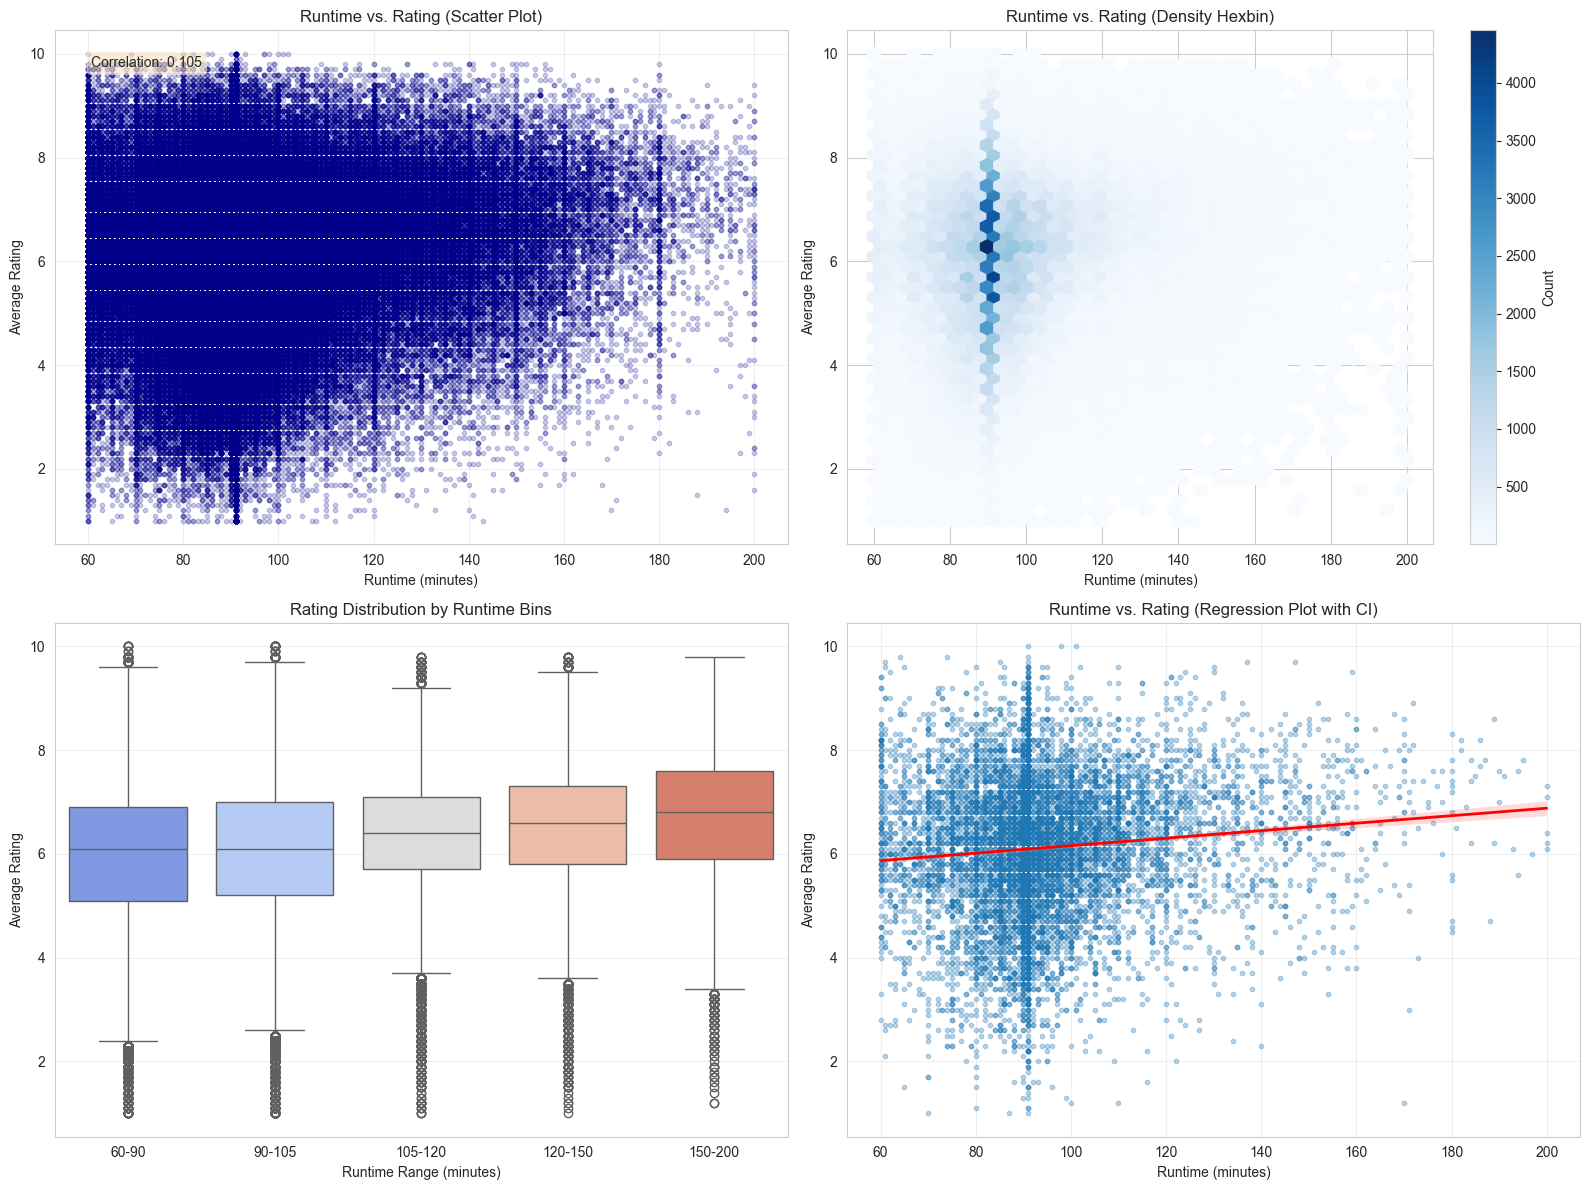

Runtime Statistics:
Mean runtime: 95.3 minutes
Median runtime: 91.0 minutes
Correlation with rating: 0.105

Rating by Runtime Bins:
             mean  median   count
runtime_bin                      
60-90        5.96     6.1  128312
90-105       6.05     6.1  120678
105-120      6.31     6.4   35074
120-150      6.49     6.6   23863
150-200      6.68     6.8    6747


In [13]:
# Filter out extreme runtimes for better visualization
df_runtime = df[(df['runtimeMinutes'] >= 60) & (df['runtimeMinutes'] <= 200)].copy()

# Create runtime bins
df_runtime['runtime_bin'] = pd.cut(df_runtime['runtimeMinutes'], 
                                     bins=[60, 90, 105, 120, 150, 200],
                                     labels=['60-90', '90-105', '105-120', '120-150', '150-200'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot
axes[0, 0].scatter(df_runtime['runtimeMinutes'], df_runtime['averageRating'], 
                   alpha=0.2, s=10, color='darkblue')
axes[0, 0].set_xlabel('Runtime (minutes)')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].set_title('Runtime vs. Rating (Scatter Plot)')
axes[0, 0].grid(True, alpha=0.3)

# Calculate correlation
runtime_corr = df_runtime[['runtimeMinutes', 'averageRating']].corr().iloc[0, 1]
axes[0, 0].text(0.05, 0.95, f'Correlation: {runtime_corr:.3f}', 
                transform=axes[0, 0].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hexbin plot
hexbin = axes[0, 1].hexbin(df_runtime['runtimeMinutes'], df_runtime['averageRating'], 
                            gridsize=40, cmap='Blues', mincnt=1)
axes[0, 1].set_xlabel('Runtime (minutes)')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Runtime vs. Rating (Density Hexbin)')
plt.colorbar(hexbin, ax=axes[0, 1], label='Count')

# Box plot by runtime bins
sns.boxplot(data=df_runtime, x='runtime_bin', y='averageRating', 
            ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_xlabel('Runtime Range (minutes)')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].set_title('Rating Distribution by Runtime Bins')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Regression plot with confidence interval
sns.regplot(data=df_runtime.sample(n=min(10000, len(df_runtime))), 
            x='runtimeMinutes', y='averageRating', 
            ax=axes[1, 1], scatter_kws={'alpha': 0.3, 's': 10}, 
            line_kws={'color': 'red', 'linewidth': 2})
axes[1, 1].set_xlabel('Runtime (minutes)')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Runtime vs. Rating (Regression Plot with CI)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Runtime Statistics:")
print(f"Mean runtime: {df_runtime['runtimeMinutes'].mean():.1f} minutes")
print(f"Median runtime: {df_runtime['runtimeMinutes'].median():.1f} minutes")
print(f"Correlation with rating: {runtime_corr:.3f}")
print(f"\nRating by Runtime Bins:")
print(df_runtime.groupby('runtime_bin')['averageRating'].agg(['mean', 'median', 'count']).round(2))

## Summary & Key Insights

This EDA reveals several important patterns in the IMDB movies dataset:

### Key Findings:
1. **Rating Distribution**: Ratings typically peak around 6-7, showing a slight positive bias
2. **Popularity Skew**: Most movies receive relatively few votes, with a small number becoming extremely popular
3. **Quality-Popularity Relationship**: Correlation analysis shows the relationship between votes and ratings
4. **Genre Preferences**: Different genres show distinct rating patterns
5. **Temporal Trends**: Movie production and ratings have evolved significantly over decades
6. **Production Growth**: Exponential growth in film production, especially in recent decades
7. **Genre Evolution**: Genre popularity has shifted dramatically over time
8. **Runtime Effects**: Analysis shows how movie length relates to audience ratings